<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/text_data/Human_vs_AI_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

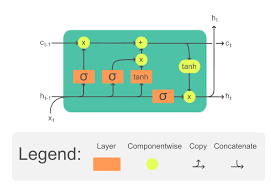

LSTM MODEL



## 🧠 Through this project: Human vs AI Essay Classification Using Stacked LSTMs

* Built a deep learning model to classify whether an essay was written by a **human** or generated by an **AI** (e.g., ChatGPT, GPT-2, etc.).
* Used a **Stacked LSTM** architecture to capture the **temporal dependencies** and **writing patterns** in text.

---

### 📄 Dataset:

* The dataset consisted of labeled essays with binary targets:

  * `0` → Human-written
  * `1` → AI-generated
* Texts were preprocessed by:

  * **Lowercasing**
  * **Removing special characters**
  * **Tokenization**
  * **Padding** to ensure uniform input length

---

### 🧠 Model Architecture:

* Used **Stacked LSTMs**:

  * Multiple LSTM layers stacked one after another to learn **hierarchical sequence patterns**
  * Helped in capturing deeper **syntactic** and **semantic structures**
* Final layer:

  * **Dense layer** with **sigmoid activation** for binary classification

---

### ⚙️ Key Components:

* **Embedding Layer** to represent words in dense vector space
* **Two or more LSTM layers** stacked for richer sequential modeling
* **Dropout layers** for regularization and to prevent overfitting
* **Binary Cross-Entropy Loss** function for binary classification
* **Adam Optimizer** for training

---

### 📊 Results & Insights:

* Evaluated model performance using:

  * **Accuracy**
  * **Precision, Recall, F1-score**
* Observed that LSTMs are capable of learning nuanced differences in **style**, **tone**, and **structure** between human and AI writing.
* Learned that deeper sequence models like stacked LSTMs outperform shallow models (like logistic regression or simple dense nets) in this kind of **text generation classification task**.




ACTIVATION FUCTION USED

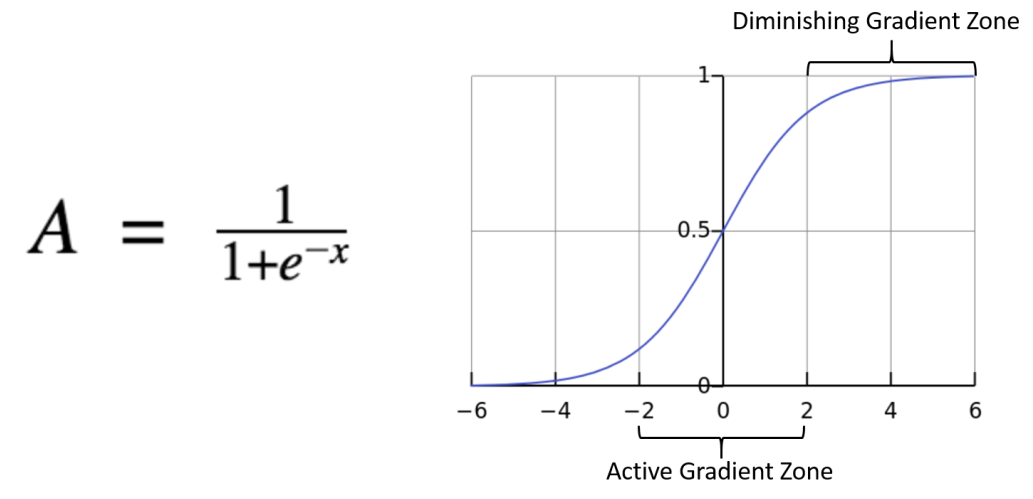

LOSS FUNCTION USED

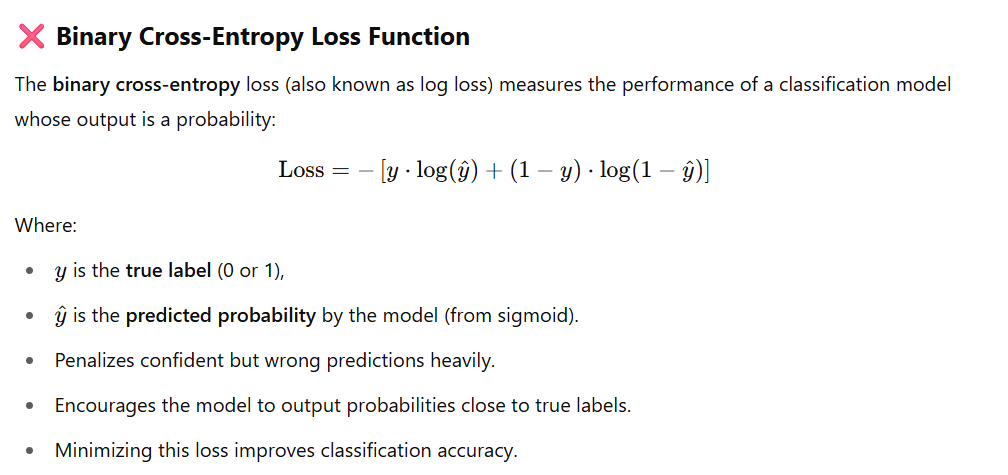

OPTIMIZER USED ADAM

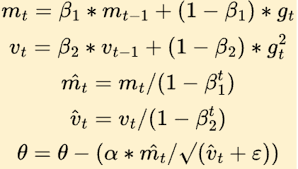

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-vs-human-text


In [ ]:
import pandas as pd
import os

dataset_directory = "/kaggle/input/ai-vs-human-text"
csv_file_path = None
for root, _, files in os.walk(dataset_directory):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break
    if csv_file_path:
        break

if csv_file_path:
    raw_dt = pd.read_csv(csv_file_path)
    print(f"Successfully loaded data from: {csv_file_path}")
else:
    print(f"No CSV file found in the directory: {dataset_directory}")

Successfully loaded data from: /kaggle/input/ai-vs-human-text/AI_Human.csv


In [ ]:
raw_dt.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [ ]:
ai_essays = raw_dt[raw_dt['generated']==1]
human_essays = raw_dt[raw_dt['generated']==0]
print(ai_essays.shape, human_essays.shape)

(181438, 2) (305797, 2)


In [ ]:
work_dt = pd.concat([ai_essays.sample(n=7000, random_state=42), human_essays.sample(n=7000, random_state=42)])
work_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 279451 to 312626
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       14000 non-null  object 
 1   generated  14000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 328.1+ KB


AI:1, Human:0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<ipython-input-10-2481063325>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=work_dt['generated'], palette='viridis')


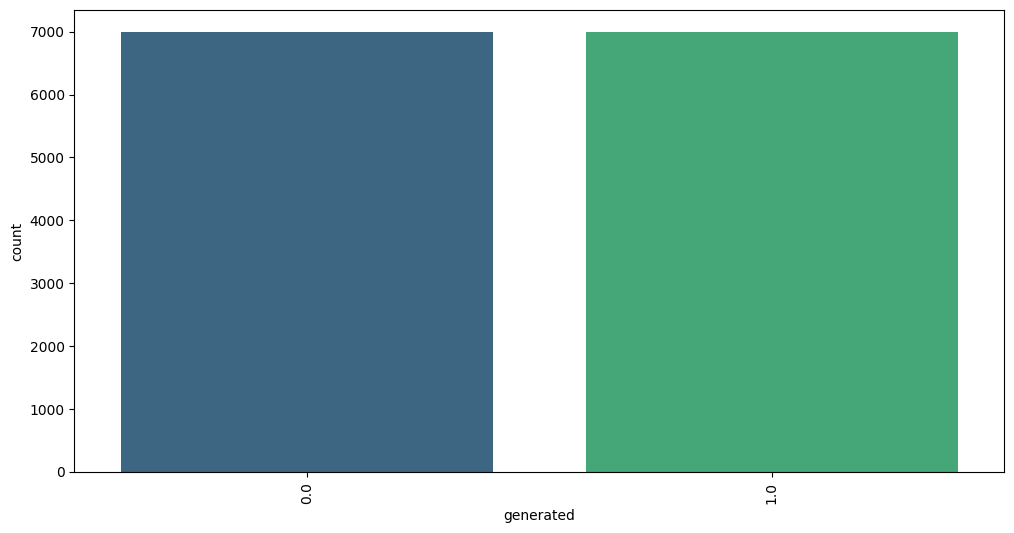

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=work_dt['generated'], palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [ ]:

X = work_dt['text']
y = work_dt['generated']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42,stratify=work_dt['class_target'])

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,stratify=temp_df['class_target'])

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 9800
Validation set size: 2100
Test set size: 2100


In [ ]:
y_train.value_counts()

,count
generated,
0.0,4916
1.0,4884


In [ ]:
# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)



---

## 🧾 Text Preprocessing with `Tokenizer` and `pad_sequences`

---

### 🔹 `Tokenizer` — Text to Integer Sequences

```python
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
```

#### ✅ What it does:

* Builds a **word index dictionary** from the text corpus.
* Converts each word in the text to a **unique integer ID**.
* Handles **Out-of-Vocabulary (OOV)** words using a special token like `<OOV>`.
* Can limit to top-N most frequent words via `num_words`.

---

### 🔹 `pad_sequences` — Make Sequences Same Length

```python
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)
```

#### ✅ What it does:

* Ensures all sequences have the **same length**, which is required for training models like LSTMs or CNNs.
* Pads shorter sequences with zeros (`0`) and truncates longer ones.
* Options:

  * `padding='pre'` or `'post'` (add zeros before or after)
  * `truncating='pre'` or `'post'`
  * `maxlen` to set fixed length

---

### 🧠 Why it's important:

* Transforms **variable-length raw text** into **fixed-size numerical input** suitable for neural networks.
* Forms the **input pipeline** for models like LSTM, GRU, CNN, or Transformer-based architectures.

---



In [ ]:
num_words=max(tokenizer.word_index.values())
num_words

41041

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'in': 6,
 'that': 7,
 'is': 8,
 'it': 9,
 'for': 10,
 'be': 11,
 'you': 12,
 'can': 13,
 'are': 14,
 'they': 15,
 'have': 16,
 'on': 17,
 'i': 18,
 'this': 19,
 'not': 20,
 'their': 21,
 'with': 22,
 'students': 23,
 'people': 24,
 'or': 25,
 'more': 26,
 'as': 27,
 'we': 28,
 'would': 29,
 'if': 30,
 'by': 31,
 'but': 32,
 'will': 33,
 'because': 34,
 'also': 35,
 'school': 36,
 'from': 37,
 'like': 38,
 'car': 39,
 'there': 40,
 'do': 41,
 'electoral': 42,
 'an': 43,
 'our': 44,
 'when': 45,
 'help': 46,
 'college': 47,
 'your': 48,
 'time': 49,
 'cars': 50,
 'them': 51,
 'all': 52,
 'about': 53,
 'could': 54,
 'some': 55,
 'should': 56,
 'one': 57,
 'has': 58,
 'make': 59,
 'at': 60,
 'was': 61,
 'so': 62,
 'what': 63,
 'who': 64,
 'get': 65,
 'may': 66,
 'other': 67,
 'many': 68,
 'just': 69,
 'states': 70,
 'my': 71,
 'how': 72,
 'work': 73,
 'vote': 74,
 'think': 75,
 'these': 76,
 'life': 77,
 'while': 78,
 'which': 79,
 'way':

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
length=[]
for i in range(0,len(X_train_seq)):
    length.append(len(X_train_seq[i]))



In [ ]:
idx_max=length.index(max(length))
print(X_train_seq[idx_max])



idx_min=length.index(min(length))
print(X_train_seq[idx_min])



[3225, 1, 165, 3, 1, 1730, 298, 1, 148, 5, 44, 100, 311, 11, 612, 1417, 3, 4144, 27, 1, 394, 5, 1, 165, 24, 311, 1195, 7, 936, 181, 2, 93, 467, 5, 5882, 3, 2937, 3, 1, 80, 1, 298, 6864, 8, 4, 250, 7, 380, 2, 11, 554, 5, 3, 624, 3673, 1514, 100, 8, 2, 1588, 1, 24, 5, 169, 298, 133, 22, 1270, 7, 13, 3478, 2, 670, 1, 380, 5, 1, 298, 32, 1, 42, 47, 966, 2, 197, 26, 3, 26, 479, 2, 167, 64, 74, 9, 311, 11, 1002, 2, 670, 1, 380, 5, 523, 4, 622, 100, 4, 26, 3630, 148, 3, 1, 152, 1369, 311, 11, 1447, 447, 482, 306, 83, 1, 206, 6, 67, 1335, 1, 42, 47, 311, 11, 1002, 2, 197, 26, 502, 447, 1, 394, 1514, 243, 70, 5, 810, 8, 5, 783, 4, 2891, 298, 22, 445, 9381, 5, 127, 380, 52, 130, 40, 14, 24, 64, 3478, 6, 369, 1361, 3, 1036, 79, 13, 321, 1, 148, 5, 1, 100, 2, 197, 43, 88, 639, 3225, 670, 1, 380, 5, 62, 68, 24, 267, 1, 42, 47, 311, 20, 300, 4, 100, 7, 651, 84, 582, 32, 267, 16, 4, 257, 713, 2, 11, 622, 6, 246, 2953, 5, 1, 298, 3, 1, 24, 13248, 14, 68, 213, 109, 4, 622, 100, 311, 11, 1089, 35126, 38

In [ ]:
X_train_seq = pad_sequences(X_train_seq, maxlen=500)
X_val_seq = pad_sequences(X_val_seq, maxlen=500)
X_test_seq = pad_sequences(X_test_seq, maxlen=500)

In [ ]:
X_train_seq

array([[   0,    0,    0, ...,   11, 2058,  796],
       [   0,    0,    0, ...,    1,  205,  511],
       [   0,    0,    0, ...,  521,    3,  812],
       ...,
       [   0,    0,    0, ...,  351,    2,  710],
       [   0,    0,    0, ..., 1809,    3,   64],
       [   0,    0,    0, ..., 1163,    2,   41]], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import BatchNormalization

In [ ]:
def create_lstm_model(embedding_size, max_words, input_shape, n_classes):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_size, input_shape=(input_shape,), mask_zero=True))

    model.add(LSTM(128, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))
    model.add(Dropout(0.2))

    model.add(LSTM(128, recurrent_dropout=0.2, dropout=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(n_classes, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model



---

## 🔄 LSTM Regularization: `dropout` vs `recurrent_dropout`

When training an LSTM, these two arguments help **prevent overfitting** by randomly dropping connections during training.

---

### 🔹 `dropout=0.2`

* Applies **dropout to the input connections** (between layers).
* 20% of the input units are randomly set to **zero** during each training step.
* Helps prevent the model from depending too heavily on any single input feature.
* Affects **input-to-hidden** connections.

---

### 🔹 `recurrent_dropout=0.2`

* Applies dropout to the **recurrent connections** — the internal state that flows across time steps.
* 20% of recurrent (hidden state) units are randomly dropped during training.
* Helps regularize **temporal dependencies** across time steps.
* Affects **hidden-to-hidden** connections **within the LSTM loop**.

---

### ✅ Why use both?

* Together, they regularize **both spatial (input)** and **temporal (sequence)** aspects of the model.
* Improves generalization and reduces risk of overfitting, especially on small or noisy text datasets.

---




In [ ]:
embedding_size = 100
max_words = num_words+1
input_shape = X_train_seq.shape[1]
n_classes = 1

model = create_lstm_model(embedding_size, max_words, input_shape, n_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 100)       │     4,104,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 500, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,370,185 (16.67 MB)

 Trainable params: 4,369,929 (16.67 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:

history = model.fit(
    X_train_seq, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_val_seq, y_val),
    callbacks=[early_stopping]
  )



Epoch 1/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 652s 4s/step - accuracy: 0.7899 - loss: 0.4124 - val_accuracy: 0.9576 - val_loss: 0.2792
Epoch 2/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.9710 - loss: 0.0954 - val_accuracy: 0.9695 - val_loss: 0.1208
Epoch 3/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 633s 4s/step - accuracy: 0.9780 - loss: 0.0820 - val_accuracy: 0.9624 - val_loss: 0.1249
Epoch 4/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 677s 4s/step - accuracy: 0.9842 - loss: 0.0586 - val_accuracy: 0.9676 - val_loss: 0.1217
Epoch 5/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 632s 4s/step - accuracy: 0.9911 - loss: 0.0350 - val_accuracy: 0.9405 - val_loss: 0.2949
Epoch 6/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9633 - val_loss: 0.1470
Epoch 7/15
154/154 ━━━━━━━━━━━━━━━━━━━━ 658s 4s/step - accuracy: 0.9930 - loss: 0.0213 - val_accuracy: 0.9119 - val_loss: 0.3197


In [ ]:


loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 610ms/step - accuracy: 0.9516 - loss: 0.1749
Test Loss: 0.1704
Test Accuracy: 0.9538


In [ ]:


from sklearn.metrics import classification_report

y_pred = model.predict(X_test_seq)

y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 608ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1066
         1.0       0.93      0.97      0.95      1034

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



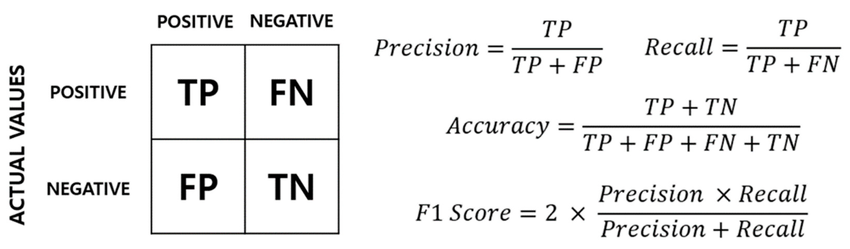